In [7]:
# Autor: Jostink Alessandro Hernandez Cruces
# Autor: Jean Carlos Corrales Colque
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataframe=pd.read_csv("MSDiabetesDataSetFinal.csv", sep=';')
clasificadores = ['No diabetes','Diabetes']

In [9]:
dataframe.head(10)

,Gender,Age,Hypertension,HeartDisease,SmokingHistory,BMI,HbA1cLevel,BloodGlucoseLevel,Diabetes
0,2,80.0,0,1,4,25.19,6.6,140,0
1,2,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,2,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
5,2,20.0,0,0,4,27.32,6.6,85,0
6,2,44.0,0,0,4,19.31,6.5,200,1
7,2,79.0,0,0,1,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,2,32.0,0,0,4,27.32,5.0,100,0


In [11]:
dataframe.describe()

,Gender,Age,Hypertension,HeartDisease,SmokingHistory,BMI,HbA1cLevel,BloodGlucoseLevel,Diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585880,41.885856,0.07485,0.039420,2.930800,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,1.686754,6.636783,1.070672,40.708136,0.278883
min,1.000000,0.080000,0.00000,0.000000,1.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,3.000000,80.000000,1.00000,1.000000,6.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
dataframe.groupby('Diabetes').size()

Diabetes
0    91500
1     8500
dtype: int64

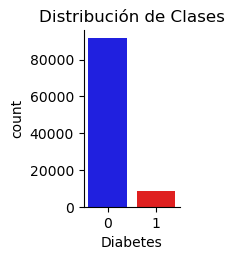

In [15]:
import seaborn as sb
dataframe['Diabetes'] = dataframe['Diabetes'].astype(int)
sb.catplot(x='Diabetes',hue='Diabetes',data=dataframe, kind="count", height=2.5, aspect=0.8, palette={0:"blue",1:"red"}, legend=False)
plt.title("Distribución de Clases")
plt.show()

In [17]:
y = dataframe['Diabetes']
x = dataframe.drop('Diabetes',axis=1)

             No diabetes  Diabetes
No diabetes        26624       829
Diabetes            1034      1513
              precision    recall  f1-score   support

 No diabetes       0.96      0.97      0.97     27453
    Diabetes       0.65      0.59      0.62      2547

    accuracy                           0.94     30000
   macro avg       0.80      0.78      0.79     30000
weighted avg       0.94      0.94      0.94     30000



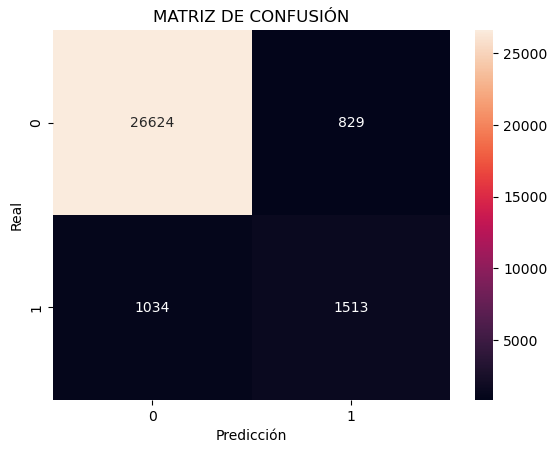

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=1)

knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["No diabetes","Diabetes"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

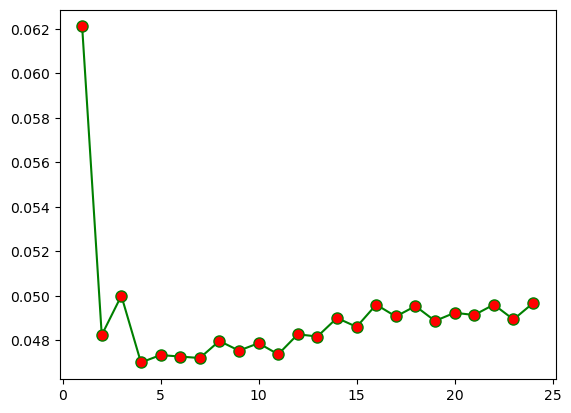

In [41]:
tasa_error =[]
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize='8')

              precision    recall  f1-score   support

 No diabetes       0.96      0.99      0.97     27453
    Diabetes       0.86      0.53      0.65      2547

    accuracy                           0.95     30000
   macro avg       0.91      0.76      0.81     30000
weighted avg       0.95      0.95      0.95     30000



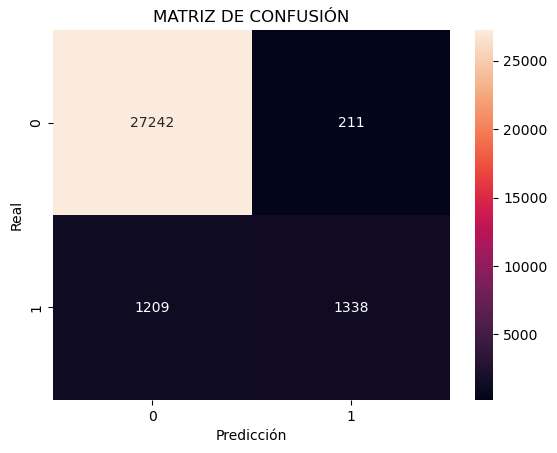

In [40]:
knn_mm = KNeighborsClassifier(n_neighbors=5)
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

In [58]:
print(knn_mm.predict([[1,80,1,1,6,38,4,80]]))
print(knn_mm.predict_proba([[1,80,1,1,6,38,4,80]]))

[0]
[[1. 0.]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
